# Kamal Solanki

## Spark Foundation

# Task
## Perform 'Exploratory Data Analysis (EDA)' on dataset 'Indian Premier League'


# Objective

### 1. As a Sports Analyst, find out the most successful teams, player and factors contribution win or loss of a team
### 2. Suggest teams or players a company should endorse for its products

#### Importing important libraries

In [1]:
import numpy as np   
import pandas as pd    
import matplotlib.pyplot as plt   
import matplotlib.style
plt.style.use('classic')
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#### Importing and reading the dataset

In [2]:
df_del=pd.read_csv("deliveries.csv")
df_mat=pd.read_csv("matches.csv")
print("Dataset is Imported")

Dataset is Imported


#### Checking the first 5 rows of the dataset

In [3]:
pd.set_option("display.max_columns",None)
df_del.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [4]:
df_mat.head(5)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


#### Checking the dataset information

In [5]:
df_del.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [6]:
df_mat.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

#### Checking the unique values of the dataset

In [7]:
for i in range(0, len(df_del.columns)):
    print(f'Unique value count of column, {df_del.columns[i]} is {df_del[df_del.columns[i]].nunique()}')
    print(f'Unique values of column, {df_del.columns[i]} is {df_del[df_del.columns[i]].unique()}')
    print("")

Unique value count of column, match_id is 756
Unique values of column, match_id is [    1     2     3     4     5     6     7     8     9    10    11    12
    13    14    15    16    17    18    19    20    21    22    23    24
    25    26    27    28    29    30    31    32    33    34    35    36
    37    38    39    40    41    42    43    44    45    46    47    48
    49    50    51    52    53    54    55    56    57    58    59    60
    61    62    63    64    65    66    67    68    69    70    71    72
    73    74    75    76    77    78    79    80    81    82    83    84
    85    86    87    88    89    90    91    92    93    94    95    96
    97    98    99   100   101   102   103   104   105   106   107   108
   109   110   111   112   113   114   115   116   117   118   119   120
   121   122   123   124   125   126   127   128   129   130   131   132
   133   134   135   136   137   138   139   140   141   142   143   144
   145   146   147   148   149   150   15

In [8]:
for j in range(0, len(df_mat.columns)):
    print(f'Unique value count of column, {df_mat.columns[j]} is {df_mat[df_mat.columns[j]].nunique()}')
    print(f'Unique values of column, {df_mat.columns[j]} is {df_mat[df_mat.columns[j]].unique()}')
    print("")

Unique value count of column, id is 756
Unique values of column, id is [    1     2     3     4     5     6     7     8     9    10    11    12
    13    14    15    16    17    18    19    20    21    22    23    24
    25    26    27    28    29    30    31    32    33    34    35    36
    37    38    39    40    41    42    43    44    45    46    47    48
    49    50    51    52    53    54    55    56    57    58    59    60
    61    62    63    64    65    66    67    68    69    70    71    72
    73    74    75    76    77    78    79    80    81    82    83    84
    85    86    87    88    89    90    91    92    93    94    95    96
    97    98    99   100   101   102   103   104   105   106   107   108
   109   110   111   112   113   114   115   116   117   118   119   120
   121   122   123   124   125   126   127   128   129   130   131   132
   133   134   135   136   137   138   139   140   141   142   143   144
   145   146   147   148   149   150   151   152   15

#### From the dataset deviveries, grouping the matches bases on match ID and getting sum of runs for each batsman

In [9]:
runs = pd.DataFrame(df_del.groupby(['match_id','batsman'])['batsman_runs'].sum())
runs = runs.reset_index()
runs.rename(columns = {'batsman':'batsman_highestruns','batsman_runs':'highest_runs'}, inplace=True)
runs.head()

,match_id,batsman_highestruns,highest_runs
0,1,A Choudhary,6
1,1,BCJ Cutting,16
2,1,CH Gayle,32
3,1,DA Warner,14
4,1,DJ Hooda,16


In [10]:
idx = runs.groupby('match_id')['highest_runs'].transform(max) == runs['highest_runs']
runs1 = runs[idx].reset_index(drop=True)
runs1

,match_id,batsman_highestruns,highest_runs
0,1,Yuvraj Singh,62
1,2,SPD Smith,84
2,3,CA Lynn,93
3,4,BA Stokes,50
4,5,KM Jadhav,69
...,...,...,...
767,11347,RG Sharma,56
768,11412,AS Yadav,71
769,11413,P Shaw,59
770,11414,SR Watson,56


#### Checking if there are any extra values in the match id column of both the dataframes

In [11]:
idx1 = pd.Index(runs.match_id)

idx2 = pd.Index(runs1.match_id)
idx1.difference(idx2).values

array([], dtype=int64)

#### runs1 dataframe shows the highest run scorer in each match 



In [12]:
df = df_mat.merge(runs1, how = 'inner', left_on = 'id', right_on = 'match_id')
df.drop('match_id', axis=1, inplace=True)
df.rename(columns = {'id':'match_id'}, inplace=True)
df.head()

,match_id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,batsman_highestruns,highest_runs
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,Yuvraj Singh,62
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,SPD Smith,84
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,CA Lynn,93
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,BA Stokes,50
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,KM Jadhav,69


#### Null value percentage for each variable.

In [13]:
nullvalues_analysis =  (pd.DataFrame(round((df.isnull().sum()/df.shape[0])*100,2), columns = ['Percentage of Null Values'])).reset_index()
nullvalues_analysis.rename(columns = {'index':'Variable'}, inplace=True)

In [14]:
nullvalues_analysis

,Variable,Percentage of Null Values
0,match_id,0.00
1,season,0.00
2,city,0.91
3,date,0.00
4,team1,0.00
5,team2,0.00
6,toss_winner,0.00
7,toss_decision,0.00
8,result,0.00
9,dl_applied,0.00


#### Variables with more than 70% null values are considered as insignificant and do not carry much information. This is also verified as per the definition of the these variables. These insignificant variables are excluded


In [15]:
insignificant_var = list(nullvalues_analysis[nullvalues_analysis['Percentage of Null Values'] >70]['Variable'])
insignificant_var

['umpire3']

In [16]:
df1=df.drop(insignificant_var, axis=1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 772 entries, 0 to 771
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   match_id             772 non-null    int64 
 1   season               772 non-null    int64 
 2   city                 765 non-null    object
 3   date                 772 non-null    object
 4   team1                772 non-null    object
 5   team2                772 non-null    object
 6   toss_winner          772 non-null    object
 7   toss_decision        772 non-null    object
 8   result               772 non-null    object
 9   dl_applied           772 non-null    int64 
 10  winner               768 non-null    object
 11  win_by_runs          772 non-null    int64 
 12  win_by_wickets       772 non-null    int64 
 13  player_of_match      768 non-null    object
 14  venue                772 non-null    object
 15  umpire1              770 non-null    object
 16  umpire2 

#### Checking for any duplicate values

In [17]:
df1.duplicated().sum()

0

#### Viewing the shape

In [18]:
df1.shape

(772, 19)

#### Checking the null values again

In [19]:
round((df1.isnull().sum()/df1.shape[0])*100,2)

match_id               0.00
season                 0.00
city                   0.91
date                   0.00
team1                  0.00
team2                  0.00
toss_winner            0.00
toss_decision          0.00
result                 0.00
dl_applied             0.00
winner                 0.52
win_by_runs            0.00
win_by_wickets         0.00
player_of_match        0.52
venue                  0.00
umpire1                0.26
umpire2                0.26
batsman_highestruns    0.00
highest_runs           0.00
dtype: float64

#### Selecting the specific variable which are significant for further analysis as per business requirements

In [20]:
df1 = df1.loc[:,['match_id','season','team1','team2','toss_decision','city','result','winner','win_by_runs','win_by_wickets','player_of_match','venue','batsman_highestruns','highest_runs']]

#### Imputing categorical variable using mode

In [21]:
for i in df1.select_dtypes(include='object').columns:
    mode = df1[i].mode()[0]
    df1[i].fillna(value = mode, inplace=True)

print('Successfully Filled')

Successfully Filled


In [22]:
round((df1.isnull().sum()/df1.shape[0])*100,2)

match_id               0.0
season                 0.0
team1                  0.0
team2                  0.0
toss_decision          0.0
city                   0.0
result                 0.0
winner                 0.0
win_by_runs            0.0
win_by_wickets         0.0
player_of_match        0.0
venue                  0.0
batsman_highestruns    0.0
highest_runs           0.0
dtype: float64

### Data Visualisation and EDA

#### Analysing the most winning teams across the seasons

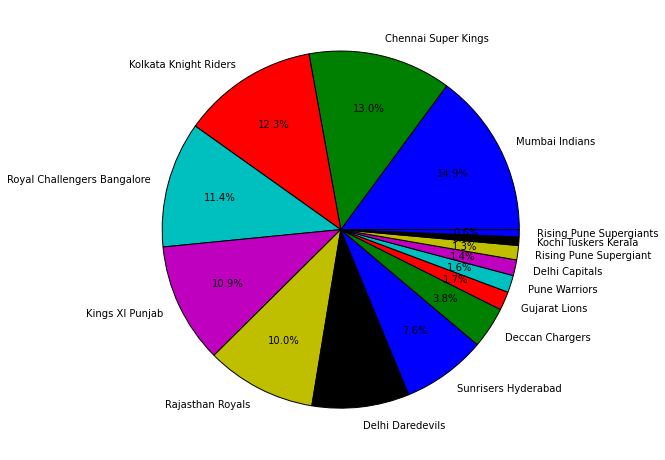

In [23]:
plt.figure(figsize=(10,8))
plt.pie(df1['winner'].value_counts().values, labels=df1['winner'].value_counts().index,pctdistance=0.7, rotatelabels=False, labeldistance=1.1, autopct='%1.1f%%')
plt.show()

#### Checking the contribution of toss decision on winning the match

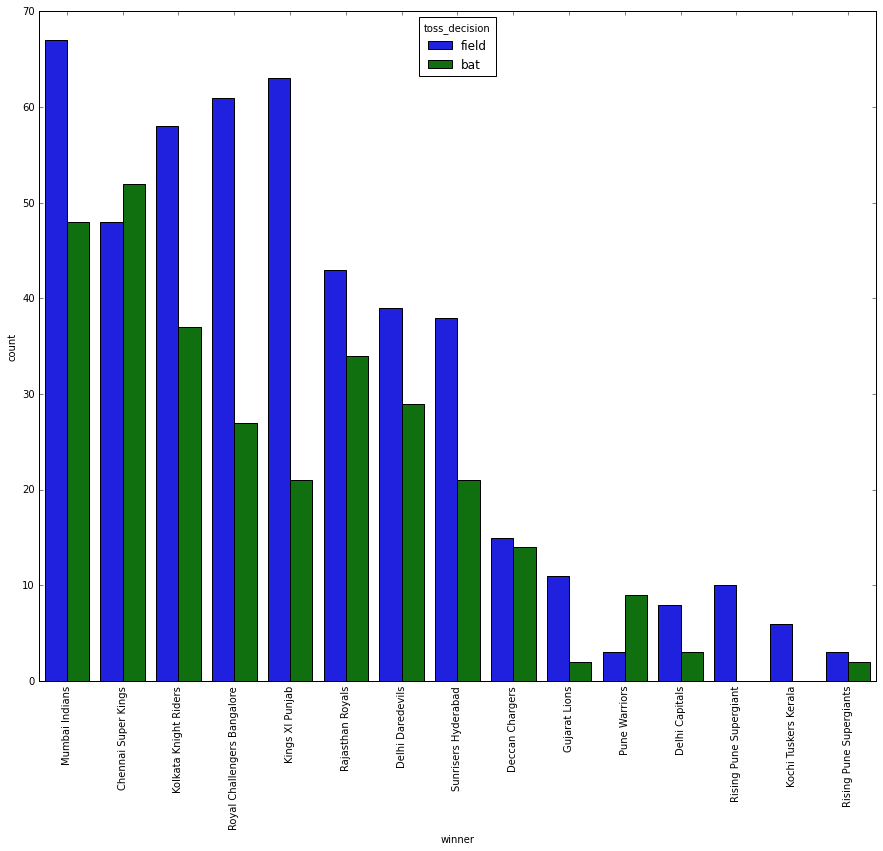

In [24]:
plt.figure(figsize = (15,12))
sns.countplot(df1['winner'], order = df1['winner'].value_counts().index, hue = df1['toss_decision'])
plt.xticks(rotation = 90)
plt.show()

#### It seems most of the winning teams had opted for fielding first
#### Checking the maximum runs in which various teams won the matches

<AxesSubplot:title={'center':'Winning team with max runs'}, xlabel='winner'>

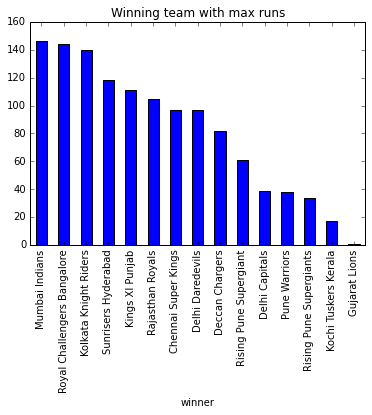

In [25]:
df1.groupby('winner')['win_by_runs'].max().sort_values(ascending=False).plot(kind='bar', title = 'Winning team with max runs')

#### Checking the match details of the team with highest winning runs

In [26]:
df1.iloc[df1['win_by_runs'].idxmax()]

match_id                             44
season                             2017
team1                    Mumbai Indians
team2                  Delhi Daredevils
toss_decision                     field
city                              Delhi
result                           normal
winner                   Mumbai Indians
win_by_runs                         146
win_by_wickets                        0
player_of_match             LMP Simmons
venue                  Feroz Shah Kotla
batsman_highestruns         LMP Simmons
highest_runs                         66
Name: 43, dtype: object

#### Checking the maximum wickets in which various teams won the matches

In [27]:
df1.groupby('winner')['win_by_wickets'].max().sort_values(ascending=False)

winner
Chennai Super Kings            10
Deccan Chargers                10
Delhi Daredevils               10
Kings XI Punjab                10
Kolkata Knight Riders          10
Mumbai Indians                 10
Rajasthan Royals               10
Royal Challengers Bangalore    10
Sunrisers Hyderabad            10
Rising Pune Supergiant          9
Rising Pune Supergiants         9
Kochi Tuskers Kerala            8
Delhi Capitals                  7
Gujarat Lions                   7
Pune Warriors                   7
Name: win_by_wickets, dtype: int64

#### Checking the player for each season who received maximum player of the match title o for each season

In [28]:
df1.groupby('season')['player_of_match'].agg(pd.Series.mode).to_frame()

,player_of_match
season,
2008,SE Marsh
2009,YK Pathan
2010,SR Tendulkar
2011,CH Gayle
2012,CH Gayle
2013,MEK Hussey
2014,GJ Maxwell
2015,"[AB de Villiers, DA Warner]"
2016,V Kohli


In [29]:
df1['player_of_match'].value_counts().head(10)

AB de Villiers    26
CH Gayle          21
RG Sharma         17
DA Warner         17
MS Dhoni          17
YK Pathan         17
SR Watson         15
SK Raina          14
G Gambhir         13
V Kohli           12
Name: player_of_match, dtype: int64

<AxesSubplot:title={'center':'Top 10 player of match across season'}>

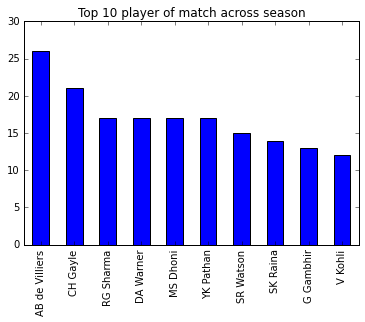

In [30]:
df1['player_of_match'].value_counts().head(10).plot(kind='bar', title = 'Top 10 player of match across season')


#### Checking the most hosted city for each winning team 

In [31]:
max_winning_venue = pd.DataFrame(df1.groupby('winner')['city'].agg(pd.Series.mode).to_frame()).reset_index()
max_winning_venue

,winner,city
0,Chennai Super Kings,Chennai
1,Deccan Chargers,"[Cuttack, Hyderabad, Mumbai]"
2,Delhi Capitals,Delhi
3,Delhi Daredevils,Delhi
4,Gujarat Lions,Rajkot
5,Kings XI Punjab,Chandigarh
6,Kochi Tuskers Kerala,Kochi
7,Kolkata Knight Riders,Kolkata
8,Mumbai Indians,Mumbai
9,Pune Warriors,Pune


#### It seems maximum match winning happened on the home ground for each team

#### Highest run scorer across the seasons

In [32]:
df1.groupby('batsman_highestruns')['highest_runs'].sum().nlargest(10)

batsman_highestruns
CH Gayle          2369
DA Warner         2003
RG Sharma         1687
AB de Villiers    1680
V Kohli           1645
G Gambhir         1589
SK Raina          1517
AM Rahane         1514
SR Watson         1406
SE Marsh          1227
Name: highest_runs, dtype: int64

<AxesSubplot:title={'center':'Top 10 Highest Run Scorers'}, xlabel='batsman_highestruns'>

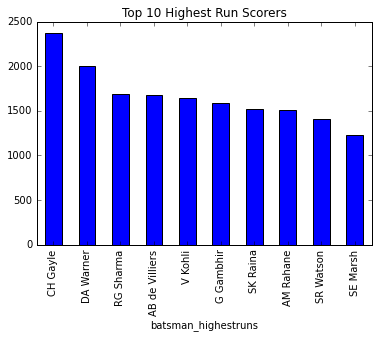

In [33]:
df1.groupby('batsman_highestruns')['highest_runs'].sum().nlargest(10).plot(kind ='bar', title = 'Top 10 Highest Run Scorers')


# Insights from EDA
### 1. Top 3 Teams with maximum victory are Mumbai Indians, Chennai Super Kings and Kolkata Knight Riders
### 2. Top 3 Winners with maximum runs are Mumbai Indians, Royal Challengers Bangalore and Kolkata Knight Riders
### 3. Top Winners with maximum wickets are Sunrisers Hyderabad, Royal Challengers Bangalore, Rajasthan Royals, Mumbai Indians and Kolkata Knight Riders
### 4. Top 3 winners of maximum player of the match titles are AB de Villers (26), CH Gayle(21), YK Pathan(17), RG Sharma(17), DA Warner(17) and MS Dhoni(17)
### 5. Top 3 run scorers across seasons are CH Gayle, DA Warner and RG Sharma
### 6. Factor responsible for the victory of the IPL Teams
#### i) Most of the winning teams had opted for fielding first. So decision on toss is an important factor for winning or losing a match
#### ii) City of the winning team. It seems maximum match winning happened on the winner's home ground

# Recommendations
### 1. A company can endorse the Best teams and players, as per above analysis the top 3 teams and player considering all the parameters are
## Best 3 Teams :
#### -Mumbai Indians
#### -Chennai Super Kings
#### -Kolkata Knight Riders

## Best 3 Players :
#### -AB de Villiers
#### -CH Gayle
#### -DA Warner

# Thank You